In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import re

In [2]:
def convert_duration_to_seconds(duration):
    pattern = r'PT(\d+H)?(\d+M)?(\d+S)?'
    hours, minutes, seconds = re.match(pattern, duration).groups()
    
    total_seconds = 0
    if hours:
        total_seconds += int(hours[:-1]) * 3600
    if minutes:
        total_seconds += int(minutes[:-1]) * 60
    if seconds:
        total_seconds += int(seconds[:-1])
    
    return total_seconds

In [3]:
train_df = pd.read_csv("../data/dataset/train/train.csv")
validate_df = pd.read_csv("../data/dataset/validation/validation.csv")

In [5]:
train_audio_df = pd.read_csv("../data/dataset/train/train_audio_clean.csv")
validate_audio_df = pd.read_csv("../data/dataset/validation/validation_audio_clean.csv")
train_audio2_df = pd.read_csv("../data/dataset/train/train_audio2.csv")
train_audio2_2_df = pd.read_csv("../data/dataset/train/train_audio2_2.csv")
validate_audio2_df = pd.read_csv("../data/dataset/validation/validation_audio2.csv")
validate_audio2_2_df = pd.read_csv("../data/dataset/validation/validation_audio2_2.csv")
train_visual_df = pd.read_csv("../data/dataset/train/train_visual.csv")
validate_visual_df = pd.read_csv("../data/dataset/validation/validation_visual.csv")
train_word_count_df = pd.read_csv("../data/dataset/train/train_word_count.csv")
validate_word_count_df = pd.read_csv("../data/dataset/validation/validation_word_count.csv")

In [6]:
# Merging in audio and visual data
train_df = train_df.merge(train_visual_df, on='id')
train_df = train_df.merge(train_audio_df, on='id')
train_df = train_df.merge(train_audio2_2_df, on='id')
train_df = train_df.merge(train_word_count_df, on='id')
validate_df = validate_df.merge(validate_visual_df, on='id')
validate_df = validate_df.merge(validate_audio_df, on='id')
validate_df = validate_df.merge(validate_audio2_2_df, on='id')
validate_df = validate_df.merge(validate_word_count_df, on='id')

In [54]:
duration_train = train_df['duration'].apply(convert_duration_to_seconds).values.reshape(-1, 1)
X_train = train_df[['speech_rate', 'pitch_mean', 'equation_indicators']]
X_train['duration'] = duration_train

# y_train = train_df['likes_per_view']
y_train = train_df['views_per_week']

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_15828\2767235135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['duration'] = duration_train


In [55]:
duration_validation = validate_df['duration'].apply(convert_duration_to_seconds).values.reshape(-1, 1)
X_validate = validate_df[['speech_rate', 'pitch_mean', 'equation_indicators']]
X_validate['duration'] = duration_validation

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_15828\2280143755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validate['duration'] = duration_validation


In [56]:
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [57]:
predictions = reg_tree.predict(X_validate)
print(predictions)

[268.44264363 412.54567625 268.44264363 104.9843488  268.44264363
 268.44264363 211.49809774 211.49809774 211.49809774 412.54567625
 211.49809774 412.54567625 412.54567625 211.49809774 412.54567625
 268.44264363 104.9843488  412.54567625 412.54567625 412.54567625
 412.54567625 268.44264363 268.44264363 268.44264363 104.9843488
 211.49809774  31.24674844 412.54567625 211.49809774 412.54567625
 268.44264363 412.54567625 211.49809774 211.49809774 268.44264363
 268.44264363 104.9843488  412.54567625 211.49809774 211.49809774
 268.44264363 412.54567625 104.9843488 ]


In [52]:
reg_tree_df = pd.DataFrame(columns=['id', 'likes_per_view_predicted', 'likes_per_view_actual'])
reg_tree_df['id'] = validate_df['id']
reg_tree_df['likes_per_view_predicted'] = predictions
reg_tree_df['likes_per_view_actual'] = validate_df['likes_per_view']
reg_tree_df.to_csv("../data/dataset/models/reg_tree/7_3.csv", header=True, index=False)

In [58]:
# MESSED UP HERE! NEED TO FIX 1.csv ACCIDENTALLY OVERWRITTEN
reg_tree_df['views_per_week_predicted'] = predictions
reg_tree_df['views_per_week_actual'] = validate_df['views_per_week']
reg_tree_df.to_csv("../data/dataset/models/reg_tree/7_3.csv", header=True, index=False)

In [60]:
# Likes
actual_outputs = reg_tree_df['likes_per_view_actual']*100
predicted_outputs = reg_tree_df['likes_per_view_predicted']*100

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_outputs, predicted_outputs)
print("Mean Absolute Error for LPV:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_outputs, predicted_outputs, squared=False)
print("Root Mean Squared Error for LPV:", rmse)

# Views
actual_outputs = reg_tree_df['views_per_week_actual']
predicted_outputs = reg_tree_df['views_per_week_predicted']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_outputs, predicted_outputs)
print("Mean Absolute Error for VPW:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_outputs, predicted_outputs, squared=False)
print("Root Mean Squared Error for VPW:", rmse)

Mean Absolute Error for LPV: 0.5028717709475942
Root Mean Squared Error for LPV: 0.6435438314139112
Mean Absolute Error for VPW: 215.73276522704344
Root Mean Squared Error for VPW: 363.7984009581704


[]

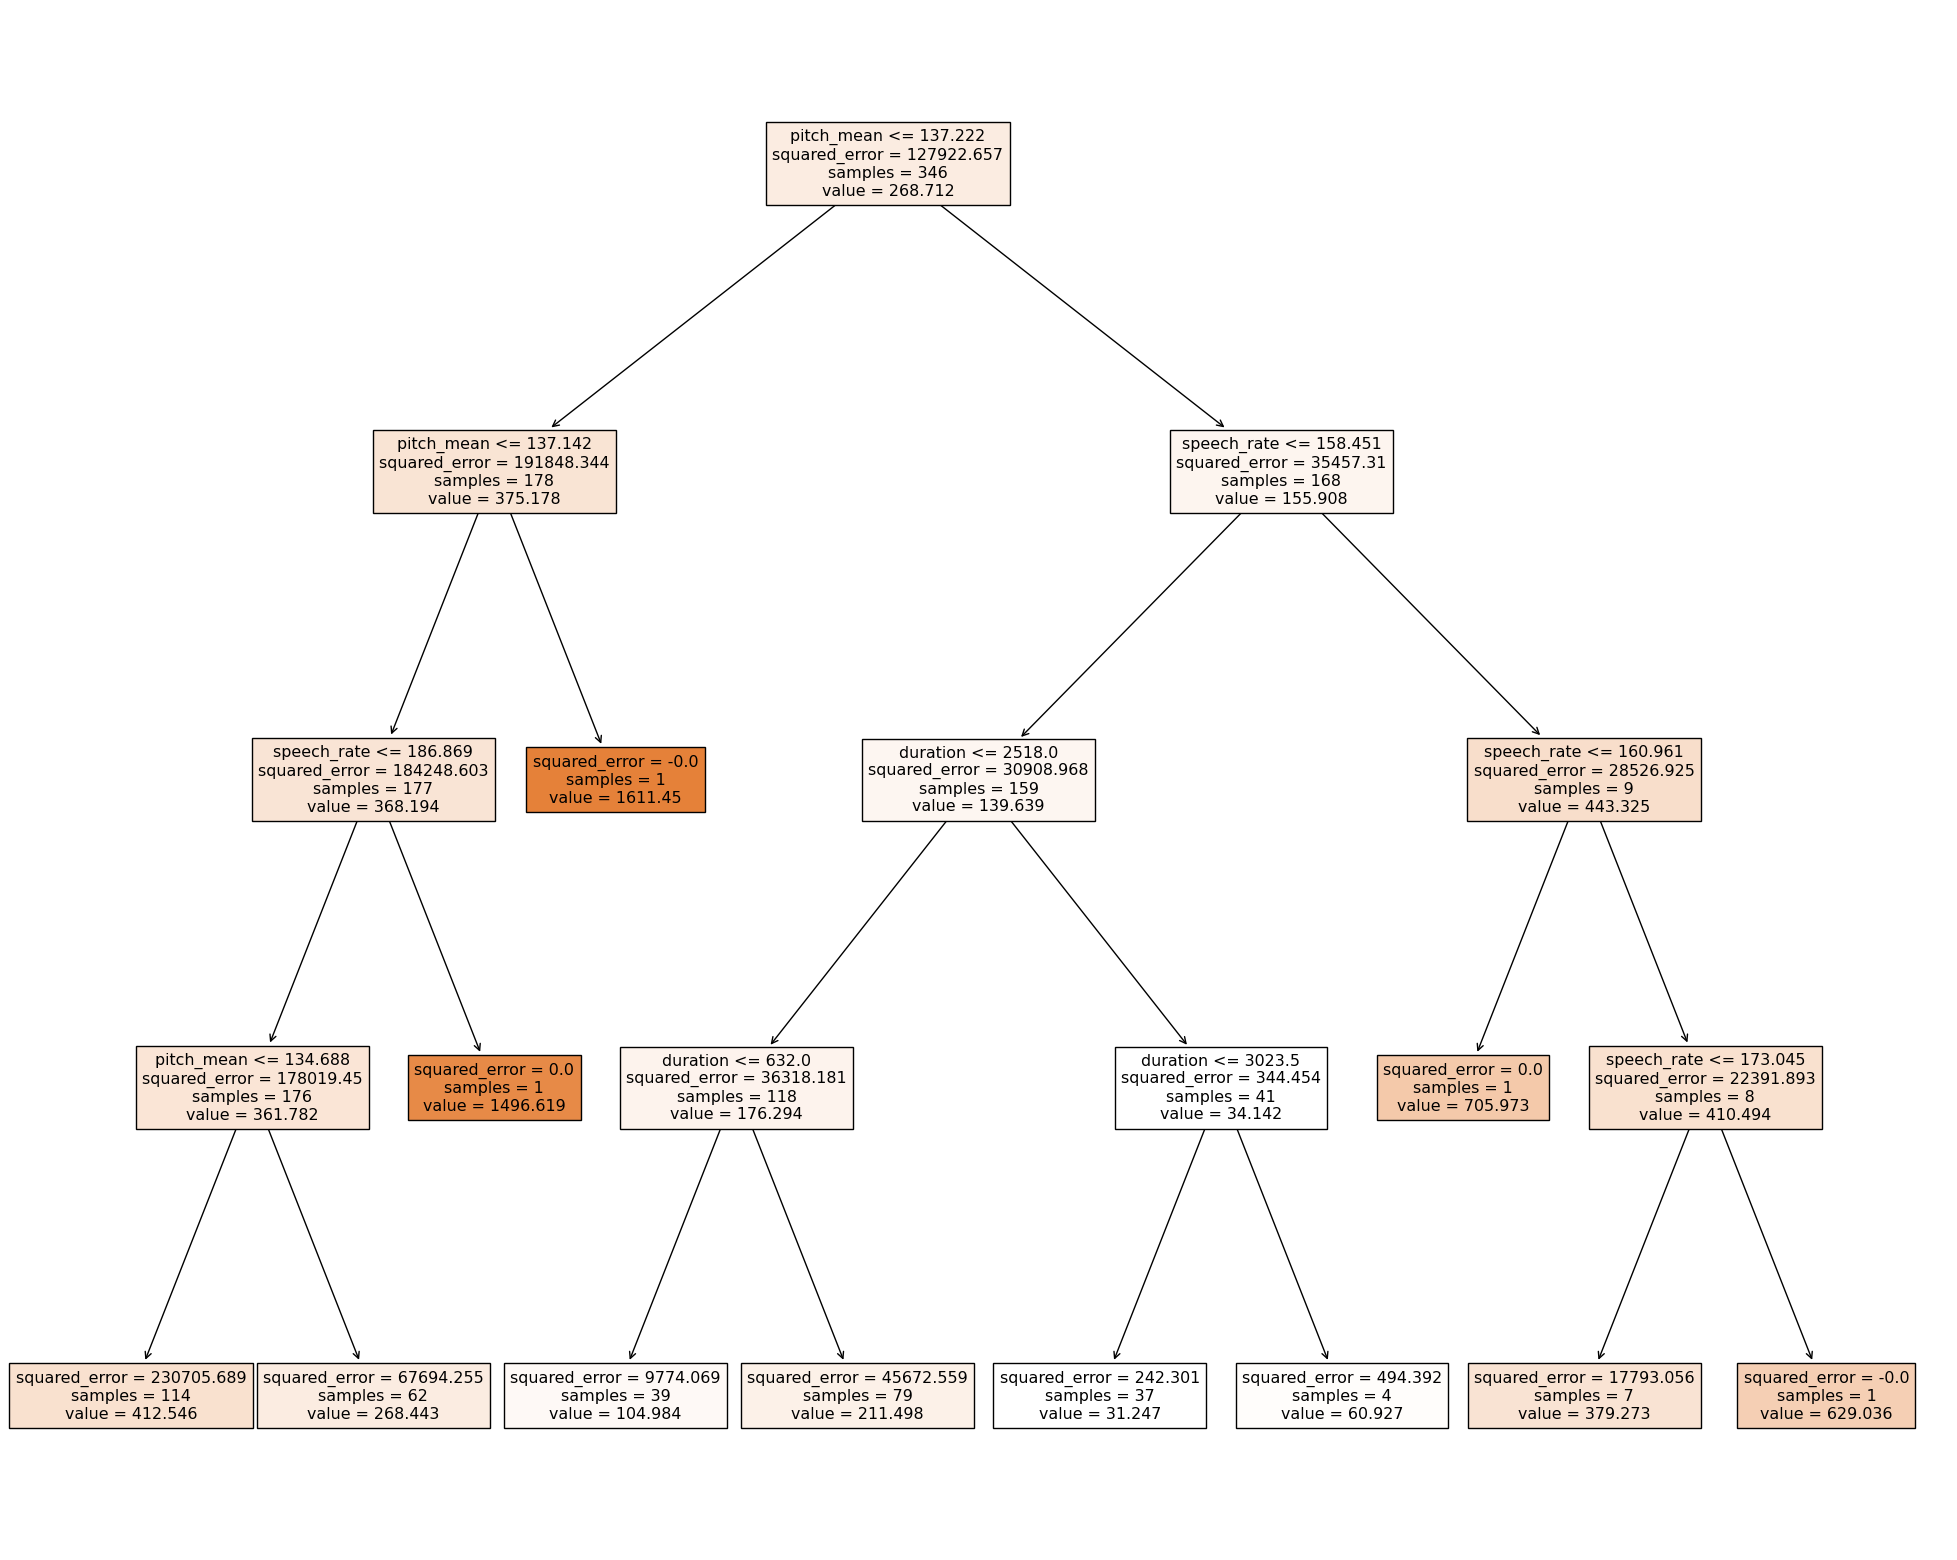

In [59]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg_tree, 
                   filled=True, feature_names=['speech_rate', 'pitch_mean', 'equation_indicators', 'duration'])
plt.plot()